In [1]:
import os
import pickle
import pandas as pd
import numpy as np
import pandas as pd
import autosklearn
from tqdm.auto import tqdm

In [2]:
def load_pickle(path):
    with open(path, 'rb') as handle:
        data = pickle.load(handle)
    return data

def save_pickle(path, data):
    with open(path, 'wb') as handle:
        pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)

def load_data(dataset_name):
    dataset_path = os.path.join("..", "data", f"{dataset_name}.pkl")
    indexes_path = os.path.join("..", "data", f"{dataset_name}_splits.pkl")
    df = pd.read_pickle(dataset_path)
    indexes = load_pickle(indexes_path)
    return df, indexes

In [3]:
all_dict = {}
only_pkl = list(filter(lambda x: x.endswith(".pkl") and not x.endswith("_10.pkl"), os.listdir(".")))
for file in tqdm(only_pkl):
    if file.endswith(".pkl"):
        data = load_pickle(file)
        all_dict.update(data)

  0%|          | 0/22 [00:00<?, ?it/s]

In [4]:
df_dict = {
    "dataset": [],
    "fold": [],
    "roc_auc": [],
    "accuracy": [],
    "models": []
}

for k, v in all_dict.items():
    length = len(v.get("models"))
    df_dict["dataset"] += [k] * length
    df_dict["fold"] += list(range(1, length + 1))
    df_dict["roc_auc"] += v.get("auc")
    df_dict["accuracy"] += v.get("accuracy")
    df_dict["models"] += v.get("models")

In [5]:
summary = pd.DataFrame.from_dict(df_dict)
summary

,dataset,fold,roc_auc,accuracy,models
0,MiniBooNE,1,0.5,0.719382,"AutoSklearn2Classifier(memory_limit=None, metr..."
1,MiniBooNE,2,0.5,0.719382,"AutoSklearn2Classifier(memory_limit=None, metr..."
2,MiniBooNE,3,0.5,0.719382,"AutoSklearn2Classifier(memory_limit=None, metr..."
3,MiniBooNE,4,0.5,0.719382,"AutoSklearn2Classifier(memory_limit=None, metr..."
4,MiniBooNE,5,0.5,0.719437,"AutoSklearn2Classifier(memory_limit=None, metr..."
...,...,...,...,...,...
215,riccardo,6,0.5,0.750000,"AutoSklearn2Classifier(memory_limit=None, metr..."
216,riccardo,7,0.5,0.750000,"AutoSklearn2Classifier(memory_limit=None, metr..."
217,riccardo,8,0.5,0.750000,"AutoSklearn2Classifier(memory_limit=None, metr..."
218,riccardo,9,0.5,0.750000,"AutoSklearn2Classifier(memory_limit=None, metr..."


In [6]:
summary.to_csv("summary.csv")

In [7]:
summary.groupby("dataset").describe()[["roc_auc", "accuracy"]]

roc_auc                                \
                                   count      mean       std       min   
dataset                                                                  
APSFailure                          10.0  0.500000  0.000000  0.500000   
Amazon_employee_access              10.0  0.872223  0.011111  0.853980   
Australian                          10.0  0.936038  0.021857  0.900679   
KDDCup09_appetency                  10.0  0.500000  0.000000  0.500000   
MiniBooNE                           10.0  0.500000  0.000000  0.500000   
adult                               10.0  0.922539  0.004531  0.915754   
airlines                            10.0  0.500000  0.000000  0.500000   
albert                              10.0  0.500000  0.000000  0.500000   
bank-marketing                      10.0  0.933456  0.007257  0.920000   
blood-transfusion-service-center    10.0  0.749903  0.041646  0.689084   
christine                           10.0  0.500000  0.000000  0.500000   
credit-g                            10.0  0.793190  0.036910  0.753333   
guillermo                           10.0  0.500000  0.000000  0.500000   
higgs                               10.0  0.800174  0.006334  0.789830   
jasmine                             10.0  0.875740  0.016639  0.841584   
kc1                                 10.0  0.837224  0.033770  0.783793   
kr-vs-kp                            10.0  0.999890  0.000215  0.999330   
nomao                               10.0  0.993504  0.000931  0.992005   
numerai28.6                         10.0  0.530174  0.004680  0.522880   
phoneme                             10.0  0.958366  0.008585  0.946832   
riccardo                            10.0  0.500000  0.000000  0.500000   
sylvine                             10.0  0.983737  0.003638  0.975559   

                                                                          \
                                       25%       50%       75%       max   
dataset                                                                    
APSFailure                        0.500000  0.500000  0.500000  0.500000   
Amazon_employee_access            0.865659  0.870384  0.878653  0.892483   
Australian                        0.922991  0.934426  0.950958  0.967742   
KDDCup09_appetency                0.500000  0.500000  0.500000  0.500000   
MiniBooNE                         0.500000  0.500000  0.500000  0.500000   
adult                             0.920146  0.921494  0.924207  0.932517   
airlines                          0.500000  0.500000  0.500000  0.500000   
albert                            0.500000  0.500000  0.500000  0.500000   
bank-marketing                    0.930488  0.934395  0.939508  0.942023   
blood-transfusion-service-center  0.718460  0.757869  0.772661  0.826023   
christine                         0.500000  0.500000  0.500000  0.500000   
credit-g                          0.767262  0.777381  0.812024  0.854762   
guillermo                         0.500000  0.500000  0.500000  0.500000   
higgs                             0.796034  0.801501  0.803111  0.810104   
jasmine                           0.868170  0.875952  0.881177  0.902774   
kc1                               0.825016  0.840086  0.856356  0.888321   
kr-vs-kp                          0.999902  1.000000  1.000000  1.000000   
nomao                             0.992916  0.993356  0.993922  0.995159   
numerai28.6                       0.526573  0.529177  0.534284  0.537269   
phoneme                           0.952550  0.958187  0.962216  0.976904   
riccardo                          0.500000  0.500000  0.500000  0.500000   
sylvine                           0.982485  0.985359  0.986200  0.986883   

                                 accuracy                                \
                                    count      mean       std       min   
dataset                                                                   
APSFailure                           10.0  0.981908  0.0

In [8]:
temp = summary.groupby("dataset").describe()[["roc_auc", "accuracy"]]

table = pd.DataFrame(index=temp.index)
temp = temp.round(decimals=2)
table["ROC AUC"] = temp[('roc_auc',  'mean')].apply(str) + " ± " + temp[('roc_auc',  'std')].apply(str)
table["Accuracy"] = temp[('accuracy',  'mean')].apply(str) + " ± " + temp[('accuracy',  'std')].apply(str)
table

,ROC AUC,Accuracy
dataset,,
APSFailure,0.5 ± 0.0,0.98 ± 0.0
Amazon_employee_access,0.87 ± 0.01,0.94 ± 0.0
Australian,0.94 ± 0.02,0.86 ± 0.05
KDDCup09_appetency,0.5 ± 0.0,0.98 ± 0.0
MiniBooNE,0.5 ± 0.0,0.72 ± 0.0
adult,0.92 ± 0.0,0.84 ± 0.04
airlines,0.5 ± 0.0,0.55 ± 0.0
albert,0.5 ± 0.0,0.5 ± 0.0
bank-marketing,0.93 ± 0.01,0.89 ± 0.01


In [9]:
table = table.loc[table["ROC AUC"] != "0.5 ± 0.0"]
table

,ROC AUC,Accuracy
dataset,,
Amazon_employee_access,0.87 ± 0.01,0.94 ± 0.0
Australian,0.94 ± 0.02,0.86 ± 0.05
adult,0.92 ± 0.0,0.84 ± 0.04
bank-marketing,0.93 ± 0.01,0.89 ± 0.01
blood-transfusion-service-center,0.75 ± 0.04,0.72 ± 0.17
credit-g,0.79 ± 0.04,0.77 ± 0.03
higgs,0.8 ± 0.01,0.72 ± 0.0
jasmine,0.88 ± 0.02,0.82 ± 0.02
kc1,0.84 ± 0.03,0.87 ± 0.02


In [10]:
print(table.to_latex())

\begin{tabular}{lll}
\toprule
{} &      ROC AUC &     Accuracy \\
dataset                          &              &              \\
\midrule
Amazon\_employee\_access           &  0.87 ± 0.01 &   0.94 ± 0.0 \\
Australian                       &  0.94 ± 0.02 &  0.86 ± 0.05 \\
adult                            &   0.92 ± 0.0 &  0.84 ± 0.04 \\
bank-marketing                   &  0.93 ± 0.01 &  0.89 ± 0.01 \\
blood-transfusion-service-center &  0.75 ± 0.04 &  0.72 ± 0.17 \\
credit-g                         &  0.79 ± 0.04 &  0.77 ± 0.03 \\
higgs                            &   0.8 ± 0.01 &   0.72 ± 0.0 \\
jasmine                          &  0.88 ± 0.02 &  0.82 ± 0.02 \\
kc1                              &  0.84 ± 0.03 &  0.87 ± 0.02 \\
kr-vs-kp                         &    1.0 ± 0.0 &    1.0 ± 0.0 \\
nomao                            &   0.99 ± 0.0 &  0.95 ± 0.03 \\
numerai28.6                      &   0.53 ± 0.0 &   0.52 ± 0.0 \\
phoneme                          &  0.96 ± 0.01 &  0.87 ± 0.04 \\

/tmp/ipykernel_1581065/3293683267.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(table.to_latex())


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
good_datasets = table.index

good_summary = summary.loc[summary.dataset.isin(good_datasets)]
good_summary

,dataset,fold,roc_auc,accuracy,models
10,sylvine,1,0.975559,0.925926,"AutoSklearn2Classifier(memory_limit=None, metr..."
11,sylvine,2,0.982399,0.947368,"AutoSklearn2Classifier(memory_limit=None, metr..."
12,sylvine,3,0.986275,0.939571,"AutoSklearn2Classifier(memory_limit=None, metr..."
13,sylvine,4,0.986883,0.935673,"AutoSklearn2Classifier(memory_limit=None, metr..."
14,sylvine,5,0.985397,0.949219,"AutoSklearn2Classifier(memory_limit=None, metr..."
...,...,...,...,...,...
195,nomao,6,0.993796,0.920778,"AutoSklearn2Classifier(memory_limit=None, metr..."
196,nomao,7,0.992832,0.960534,"AutoSklearn2Classifier(memory_limit=None, metr..."
197,nomao,8,0.995159,0.968079,"AutoSklearn2Classifier(memory_limit=None, metr..."
198,nomao,9,0.993015,0.965177,"AutoSklearn2Classifier(memory_limit=None, metr..."


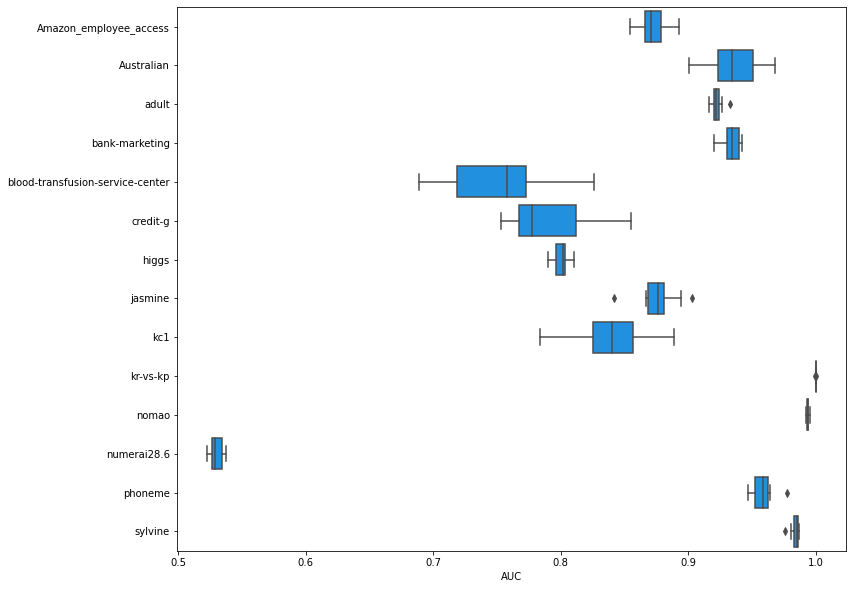

In [13]:
plt.figure(figsize=(12, 10))
sns.boxplot(data=good_summary.sort_values(by="dataset"), x="roc_auc", y="dataset", color="#0096FF")
plt.xlabel("AUC")
plt.ylabel("")
plt.savefig("auc", bbox_inches = 'tight')
plt.show()

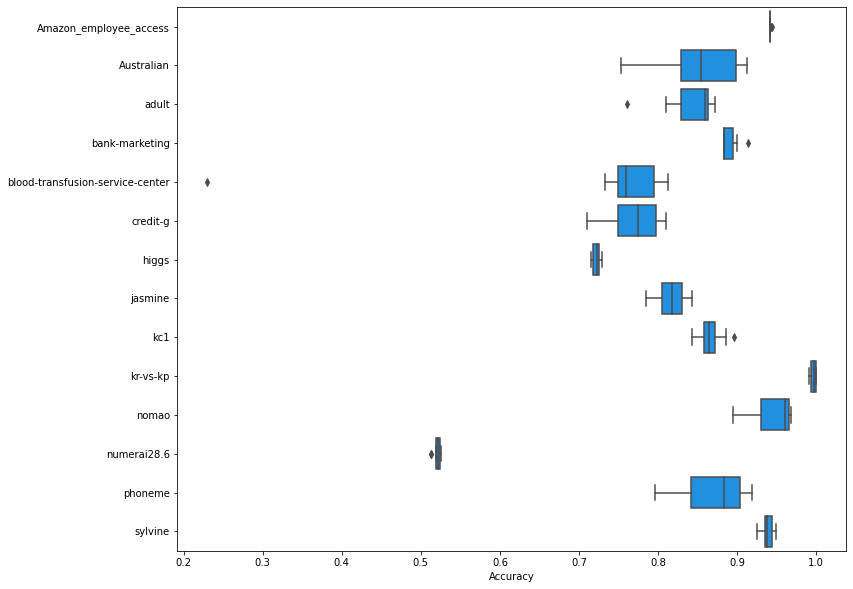

In [14]:
plt.figure(figsize=(12, 10))
sns.boxplot(data=good_summary.sort_values(by="dataset"), x="accuracy", y="dataset", color="#0096FF")
plt.xlabel("Accuracy")
plt.ylabel("")
plt.savefig("accuracy")
plt.show()

In [15]:
used_models = []
for x in summary.models:
    try:
        used_models.append(x.show_models())
    except:
        pass

In [16]:
from collections import Counter
types_of_models = []
for model in used_models:
    for k in model.keys():
        types_of_models.append(model[k]['classifier'])

In [17]:
sklearn_models = [type(el.choice).__name__ for el in types_of_models]

s = pd.Series(sklearn_models)
s

0                    RandomForest
1                    RandomForest
2            ExtraTreesClassifier
3            ExtraTreesClassifier
4            ExtraTreesClassifier
                  ...            
285    GradientBoostingClassifier
286    GradientBoostingClassifier
287    GradientBoostingClassifier
288    GradientBoostingClassifier
289    GradientBoostingClassifier
Length: 290, dtype: object

In [18]:
model_number = s.value_counts().reset_index()
model_number = model_number.rename(columns={"index": "Type of model", 0: "Number of occurences"})
model_number

,Type of model,Number of occurences
0,GradientBoostingClassifier,96
1,ExtraTreesClassifier,78
2,RandomForest,57
3,MLPClassifier,31
4,SGD,14
5,PassiveAggressive,14


In [19]:
model_number.to_csv("occurences.csv")

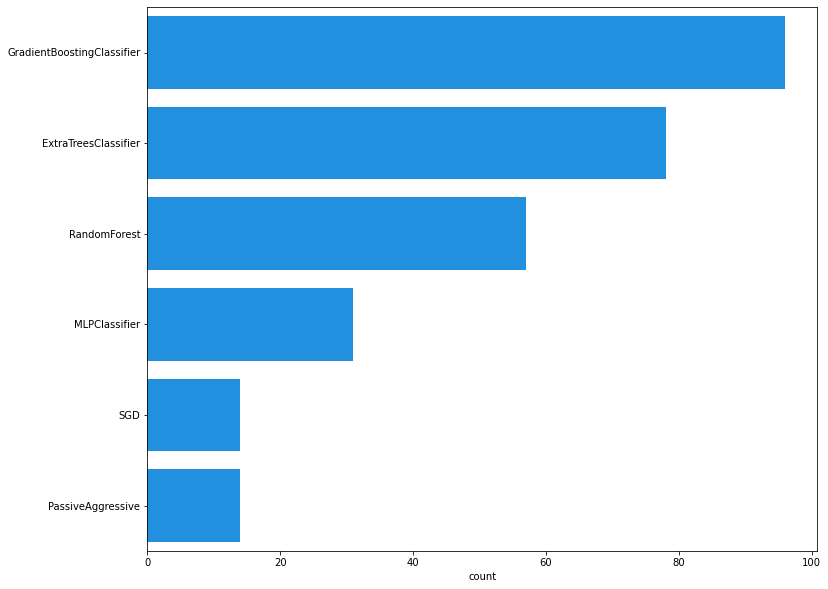

In [20]:
plt.figure(figsize=(12, 10))
sns.countplot(y=sklearn_models, order=s.value_counts().index, color="#0096FF")
plt.savefig("Counted_models", bbox_inches = 'tight')
plt.show()

In [21]:
model_weight = {}
for model in used_models:
    for k in model.keys():
        key = type(model[k]['classifier'].choice).__name__
        val = model[k]['ensemble_weight']
        new_val = model_weight.get(key, [])
        new_val.append(val)
        model_weight[key] = new_val

In [22]:
s = [(k, np.mean(model_weight[k])) for k in model_weight.keys()]
s

[('RandomForest', 0.04596491228070176),
 ('ExtraTreesClassifier', 0.061538461538461535),
 ('GradientBoostingClassifier', 0.05375),
 ('SGD', 0.051428571428571435),
 ('MLPClassifier', 0.05419354838709678),
 ('PassiveAggressive', 0.03571428571428571)]

In [23]:
mod_weight = pd.DataFrame.from_records(s, columns=["model", "mean_weights"])
mod_weight

,model,mean_weights
0,RandomForest,0.045965
1,ExtraTreesClassifier,0.061538
2,GradientBoostingClassifier,0.053750
3,SGD,0.051429
4,MLPClassifier,0.054194
5,PassiveAggressive,0.035714


In [24]:
print(mod_weight.to_latex(index=False))

\begin{tabular}{lr}
\toprule
                     model &  mean\_weights \\
\midrule
              RandomForest &      0.045965 \\
      ExtraTreesClassifier &      0.061538 \\
GradientBoostingClassifier &      0.053750 \\
                       SGD &      0.051429 \\
             MLPClassifier &      0.054194 \\
         PassiveAggressive &      0.035714 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_1581065/2293306646.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(mod_weight.to_latex(index=False))


In [25]:
mod_weight.to_csv("model_weights.csv")